### Import necessary libraries

In [3]:
import pandas as pd

# 1. Data Collection and Manipulation

## 1.1 Automatic Download of Dataset

In [4]:
!wget -q http://files.grouplens.org/datasets/movielens/ml-1m.zip

zsh:1: command not found: wget


In [6]:
!unzip -q ml-1m.zip

unzip:  cannot find or open ml-1m.zip, ml-1m.zip.zip or ml-1m.zip.ZIP.


## 1.2 Save to csv files

In [7]:
 # Load the users file and save to CSV
users = pd.read_csv('../../data/processed/users.csv')

# Load the movies file and save to CSV
movies = pd.read_csv('../../data/processed/movies.csv')

# Load the ratings file and save to CSV
ratings = pd.read_csv('../../data/processed/ratings.csv')

## 1.3 Print the first few rows of the each dataframe

In [8]:
# Print the first few rows of the users dataframe to check user details like user ID and demographics
print("First few rows of the users dataframe:")
print(users.head())
print("\n")  # Adds a newline for better separation of the output

# Print the first few rows of the movies dataframe to view movie information such as movie ID and title
print("First few rows of the movies dataframe:")
print(movies.head())
print("\n")  # Adds a newline for better separation of the output

# Print the first few rows of the ratings dataframe to inspect entries of user ratings for movies
print("First few rows of the ratings dataframe:")
print(ratings.head())

First few rows of the users dataframe:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


First few rows of the movies dataframe:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


First few rows of the ratings dataframe:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3   

## 1.4 Print the column names of the each dataframe

In [9]:
# Print the column names of the users dataframe to understand the fields related to user information
print("Column names in the users dataframe:")
print(users.columns)
print("\n")  # Adds a newline for better separation of the output

# Print the column names of the movies dataframe to see the attributes associated with movies, such as titles and genres
print("Column names in the movies dataframe:")
print(movies.columns)
print("\n")  # Adds a newline for better separation of the output

# Print the column names of the ratings dataframe to review the fields that link users and movies through ratings
print("Column names in the ratings dataframe:")
print(ratings.columns)

Column names in the users dataframe:
Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')


Column names in the movies dataframe:
Index(['MovieID', 'Title', 'Genres'], dtype='object')


Column names in the ratings dataframe:
Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')


## 1.5 Checking for missing values in each dataframe

In [10]:
# Display the number of missing values in each column of the users dataframe
print("Missing values in the users dataframe:")
print(users.isnull().sum())
print("\n")  # Adds a newline for better separation of output

# Display the number of missing values in each column of the movies dataframe
print("Missing values in the movies dataframe:")
print(movies.isnull().sum())
print("\n")  # Adds a newline for better separation of output

# Display the number of missing values in each column of the ratings dataframe
print("Missing values in the ratings dataframe:")
print(ratings.isnull().sum())

Missing values in the users dataframe:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


Missing values in the movies dataframe:
MovieID    0
Title      0
Genres     0
dtype: int64


Missing values in the ratings dataframe:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


## 1.6 Convert the 'Timestamp' column in the ratings dataframe from Unix time to datetime format.

In [11]:
# This enhances readability and usability of the timestamp data for further analysis.
ratings['Timestamp'] = pd.to_datetime(ratings['Timestamp'], unit='s')

# Display the first few rows of the ratings dataframe to confirm the successful conversion of the 'Timestamp' column.
print("First few rows of the ratings dataframe after converting 'Timestamp':")
print(ratings.head())

First few rows of the ratings dataframe after converting 'Timestamp':
   UserID  MovieID  Rating           Timestamp
0       1     1193       5 2000-12-31 22:12:40
1       1      661       3 2000-12-31 22:35:09
2       1      914       3 2000-12-31 22:32:48
3       1     3408       4 2000-12-31 22:04:35
4       1     2355       5 2001-01-06 23:38:11


## 1.7  Merge the ratings dataframe with the movies dataframe on the MovieID column.


In [12]:
# This step combines movie rating data with corresponding movie details.
merged_data = pd.merge(ratings, movies, on='MovieID')

# Further merge the resulting dataframe with the users dataframe on the UserID column.
# This addition includes user demographic details into the merged dataset.
merged_data = pd.merge(merged_data, users, on='UserID')

# Display the column names of the merged dataframe to verify successful merges and to understand the available data fields.
print("Columns in the merged dataframe:")
print(merged_data.columns)

Columns in the merged dataframe:
Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')


## 1.6 Removing Duplicates

In [13]:
dup_bool = merged_data.duplicated(['UserID','MovieID','Rating','Timestamp'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


## 3.4 Matrix Factorization

###3.4.1 Matrix factorization using SVD




In [14]:
from surprise import Dataset, Reader, KNNWithMeans, SVD, accuracy
from surprise.model_selection import train_test_split

In [15]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(merged_data[['UserID','MovieID','Rating']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

In [16]:
algo_svd = SVD()
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

In [17]:
predictions_svd

[Prediction(uid=2116, iid=21, r_ui=4.0, est=3.703828094700873, details={'was_impossible': False}),
 Prediction(uid=3300, iid=10, r_ui=3.0, est=3.720961765973142, details={'was_impossible': False}),
 Prediction(uid=1313, iid=3827, r_ui=3.0, est=3.455717691856679, details={'was_impossible': False}),
 Prediction(uid=4543, iid=1954, r_ui=4.0, est=4.158121969231158, details={'was_impossible': False}),
 Prediction(uid=150, iid=2312, r_ui=3.0, est=4.39081061930054, details={'was_impossible': False}),
 Prediction(uid=1150, iid=319, r_ui=5.0, est=3.36599436905514, details={'was_impossible': False}),
 Prediction(uid=735, iid=3256, r_ui=4.0, est=3.735041473058763, details={'was_impossible': False}),
 Prediction(uid=293, iid=263, r_ui=4.0, est=3.528195699934648, details={'was_impossible': False}),
 Prediction(uid=558, iid=1957, r_ui=5.0, est=3.995355242080471, details={'was_impossible': False}),
 Prediction(uid=4510, iid=3471, r_ui=4.0, est=3.0366995068016314, details={'was_impossible': False}),
 

In [18]:
print("SVD RMSE:")
accuracy.rmse(predictions_svd)

SVD RMSE:
RMSE: 0.8768


0.8767654392600681

In [19]:
user_id = 1
movie_id = 1193
prediction_svd = algo_svd.predict(user_id, movie_id)
print(f"Prediction for User {user_id} on Movie {movie_id} (SVD):")
print(prediction_svd)

Prediction for User 1 on Movie 1193 (SVD):
user: 1          item: 1193       r_ui = None   est = 4.15   {'was_impossible': False}


In [20]:
from surprise import Dataset, Reader, NMF, accuracy
from surprise.model_selection import train_test_split


In [21]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_data[['UserID', 'MovieID', 'Rating']], reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

In [22]:
# Initialize and train the NMF algorithm
algo_nmf = NMF()
algo_nmf.fit(trainset)

In [23]:
# Test the NMF algorithm on the test set
predictions_nmf = algo_nmf.test(testset)

In [24]:
# Evaluate RMSE for NMF
print("NMF RMSE:")
accuracy.rmse(predictions_nmf)

NMF RMSE:
RMSE: 0.9138


0.9138489042517364

In [25]:
# Example prediction for a specific user and movie
user_id = 1
movie_id = 1193
prediction_nmf = algo_nmf.predict(user_id, movie_id)
print(f"Prediction for User {user_id} on Movie {movie_id} (NMF):")
print(prediction_nmf)

Prediction for User 1 on Movie 1193 (NMF):
user: 1          item: 1193       r_ui = None   est = 4.38   {'was_impossible': False}


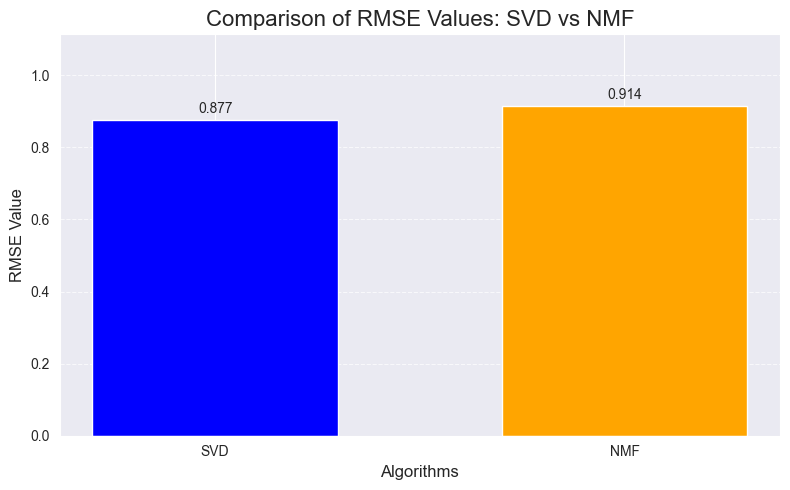

In [30]:
import matplotlib.pyplot as plt

# Define RMSE values for SVD and NMF
algorithms = ['SVD', 'NMF']
rmse_values = [accuracy.rmse(predictions_svd, verbose=False),
               accuracy.rmse(predictions_nmf, verbose=False)]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(algorithms, rmse_values, color=['blue', 'orange'], width=0.6)

# Add plot details
plt.title('Comparison of RMSE Values: SVD vs NMF', fontsize=16)
plt.ylabel('RMSE Value', fontsize=12)
plt.xlabel('Algorithms', fontsize=12)
plt.ylim(0, max(rmse_values) + 0.2)  # Extend y-axis for clarity

# Annotate RMSE values on top of the bars
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()
